# Speech Generator EDA
- creted 24 MArch 2020

In [1]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display
from matplotlib import cm
import seaborn as sns
from functools import partial
import sklearn
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import ctypes
from os import makedirs
import os
from os.path import join
import shutil

%matplotlib inline

In [2]:
np_load_old = partial(np.load)
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
np.random.seed(42)

## Load Data 

In [3]:
 # load raw data
raw_data = np.load('../data/d_dataset_p2/dataset.npz')
audio_data = raw_data['ns_audio_data']
labels = raw_data['ns_aggregate_param']
phonetic = raw_data['ns_aggregate_phonetic']
sid = raw_data['ns_sid']
del raw_data

## Speech Characteristic 

In [4]:
phonetic[1]

array(['y', 'O'], dtype='<U2')

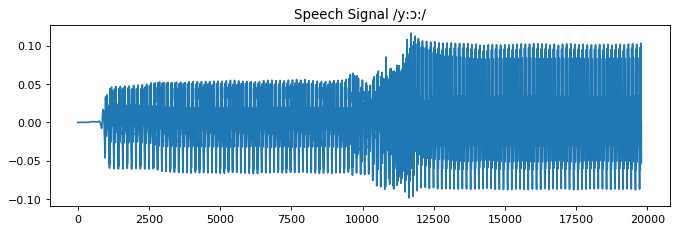

<Figure size 432x288 with 0 Axes>

In [5]:
plt.figure(num=None, figsize=(10, 3), dpi=80, facecolor='w', edgecolor='k')
plt.title('Speech Signal /y:ɔ:/')
plt.plot(audio_data[1])
plt.show()
plt.savefig('wave.png')

C:\Users\THANATLAPTHAWAN\Anaconda3\envs\thesis_env\lib\site-packages\matplotlib\axes\_axes.py:7739: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


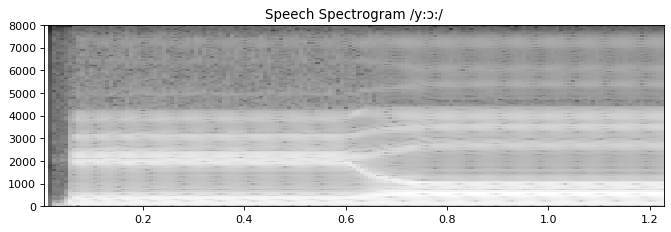

<Figure size 432x288 with 0 Axes>

In [6]:
plt.figure(num=None, figsize=(10, 3), dpi=80, facecolor='w', edgecolor='k')
plt.title('Speech Spectrogram /y:ɔ:/')
plt.specgram(audio_data[1],Fs=16000,cmap='gray')
plt.show()
plt.savefig('spec.png')

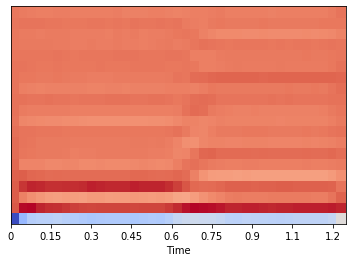

In [7]:
mfcc = librosa.feature.mfcc(audio_data[1], sr=16000, n_mfcc = 20)
librosa.display.specshow(mfcc, sr=16000, x_axis='time')
plt.savefig('mfcc.png')

In [8]:
prep_mfcc = sklearn.preprocessing.scale(mfcc, axis=1)

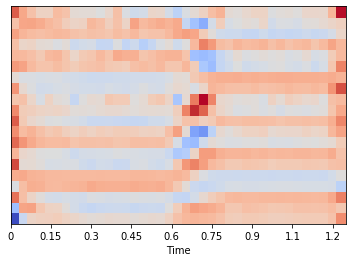

In [9]:
librosa.display.specshow(prep_mfcc, sr=16000, x_axis='time')
plt.savefig('mfcc_norm.png')

## Sampling Data 

In [10]:
num_item = int(phonetic.shape[0]*0.7)
audio_data = audio_data[:num_item]
phonetic = phonetic[:num_item]
labels = labels[:num_item]
sid = sid[:num_item]

In [11]:
labels.shape

(29322, 2, 24)

In [12]:
label_sep = np.array([i for item in labels for i in item])
phonetic_sep = np.array([i for item in phonetic for i in item])

In [13]:
label_sep.shape

(58644, 24)

## PCA articulatory space 

In [14]:
pca = PCA(n_components=3)
pca.fit(label_sep)
labels_pca = pca.transform(label_sep)
pca_data = pd.DataFrame({'phonetic': phonetic_sep, 'PCA1': labels_pca[:,0], 'PCA2': labels_pca[:,1],'PCA3': labels_pca[:,2]})

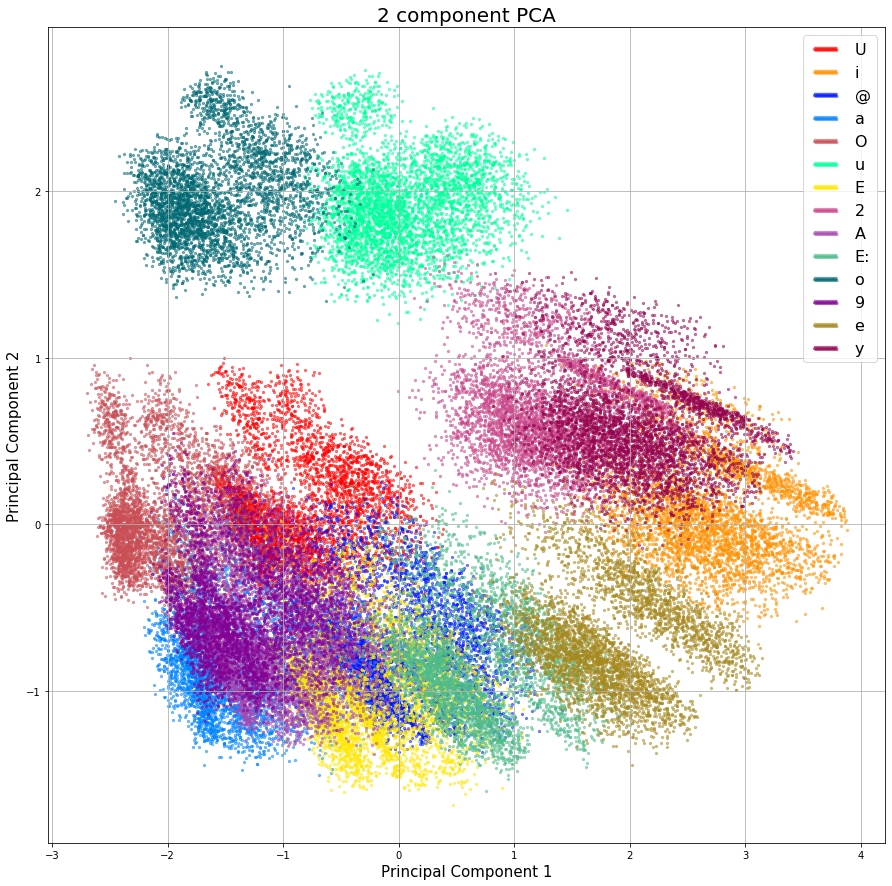

In [15]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
color = ['#FF0000','#FF9200','#0018FF','#0084FF','#CA4E55','#00FF9E','#FFE900','#CB478A','#A849B3','#4DBD8B','#006973','#840095','#A7891E','#96044F','#007741']

i = 0
targets = list(set(phonetic_sep))
for target in targets:
    indicesToKeep = pca_data['phonetic'] == target
    ax.scatter(pca_data.loc[indicesToKeep, 'PCA1']
               , pca_data.loc[indicesToKeep, 'PCA2']
               , s = 5,
               alpha=0.5,
              color=color[i])
    i += 1
lgnd = ax.legend(targets, scatterpoints=30, fontsize=16)
ax.grid()
plt.savefig('pca_all_1_2.png')

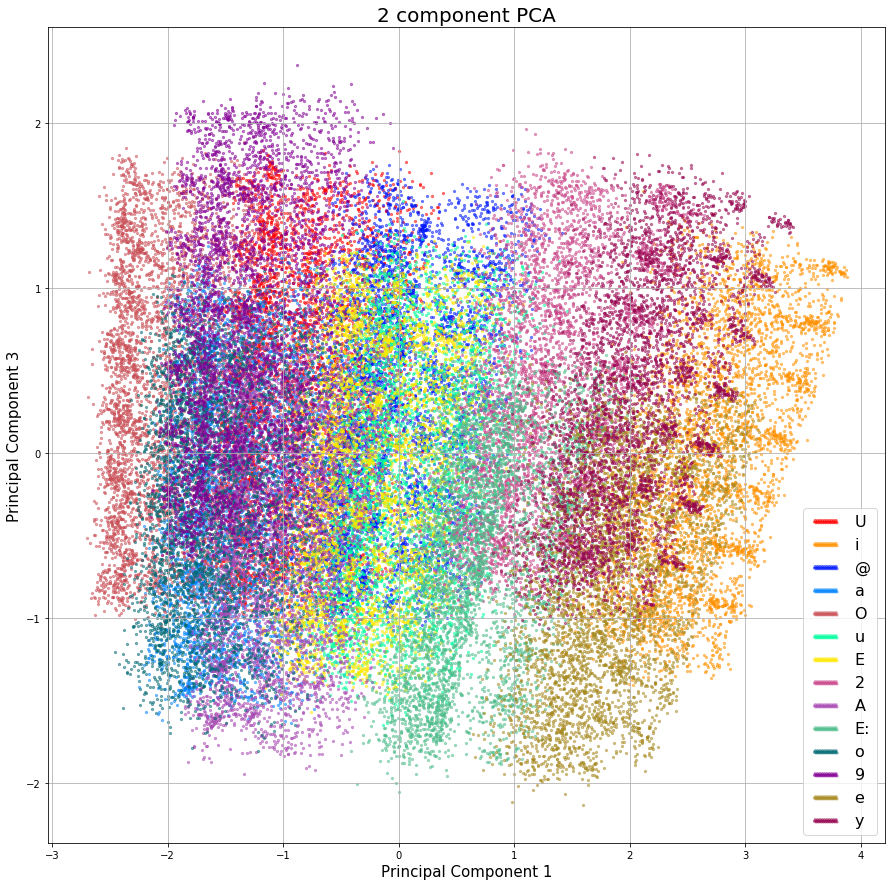

In [16]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
color = ['#FF0000','#FF9200','#0018FF','#0084FF','#CA4E55','#00FF9E','#FFE900','#CB478A','#A849B3','#4DBD8B','#006973','#840095','#A7891E','#96044F','#007741']

i = 0
targets = list(set(phonetic_sep))
for target in targets:
    indicesToKeep = pca_data['phonetic'] == target
    ax.scatter(pca_data.loc[indicesToKeep, 'PCA1']
               , pca_data.loc[indicesToKeep, 'PCA3']
               , s = 5,
               alpha=0.5,
              color=color[i])
    i += 1
lgnd = ax.legend(targets, scatterpoints=30, fontsize=16)
ax.grid()
plt.savefig('pca_all_1_3.png')

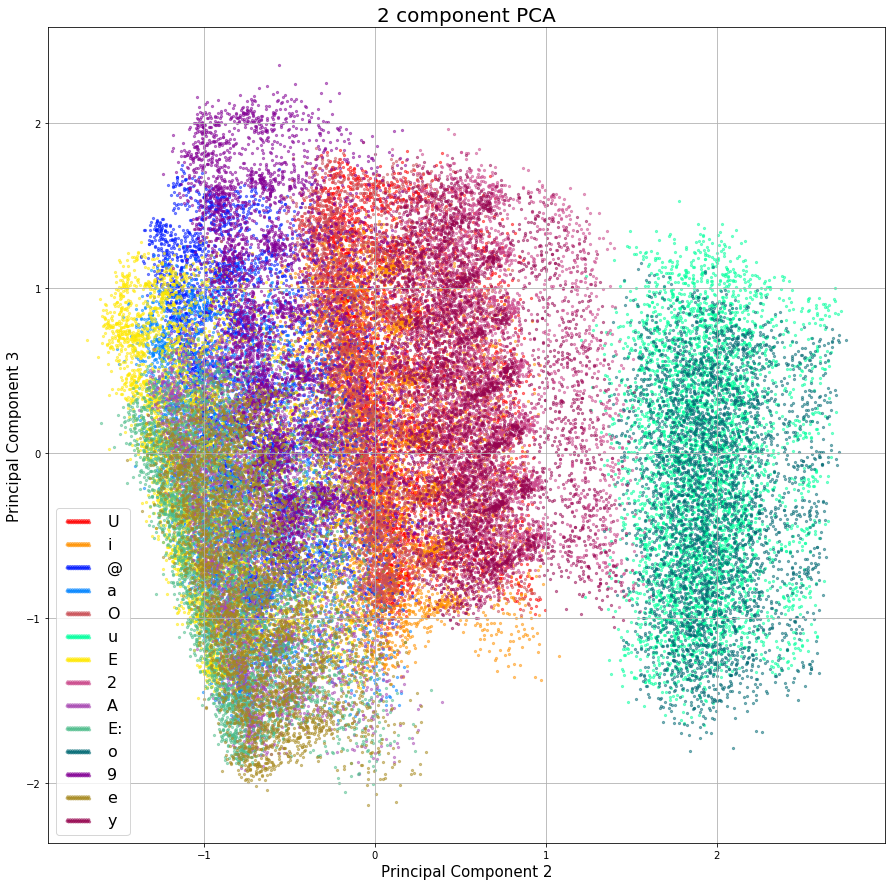

In [17]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
color = ['#FF0000','#FF9200','#0018FF','#0084FF','#CA4E55','#00FF9E','#FFE900','#CB478A','#A849B3','#4DBD8B','#006973','#840095','#A7891E','#96044F','#007741']

i = 0
targets = list(set(phonetic_sep))
for target in targets:
    indicesToKeep = pca_data['phonetic'] == target
    ax.scatter(pca_data.loc[indicesToKeep, 'PCA2']
               , pca_data.loc[indicesToKeep, 'PCA3']
               , s = 5,
               alpha=0.5,
              color=color[i])
    i += 1
lgnd = ax.legend(targets, scatterpoints=30, fontsize=16)
ax.grid()
plt.savefig('pca_all_2_3.png')

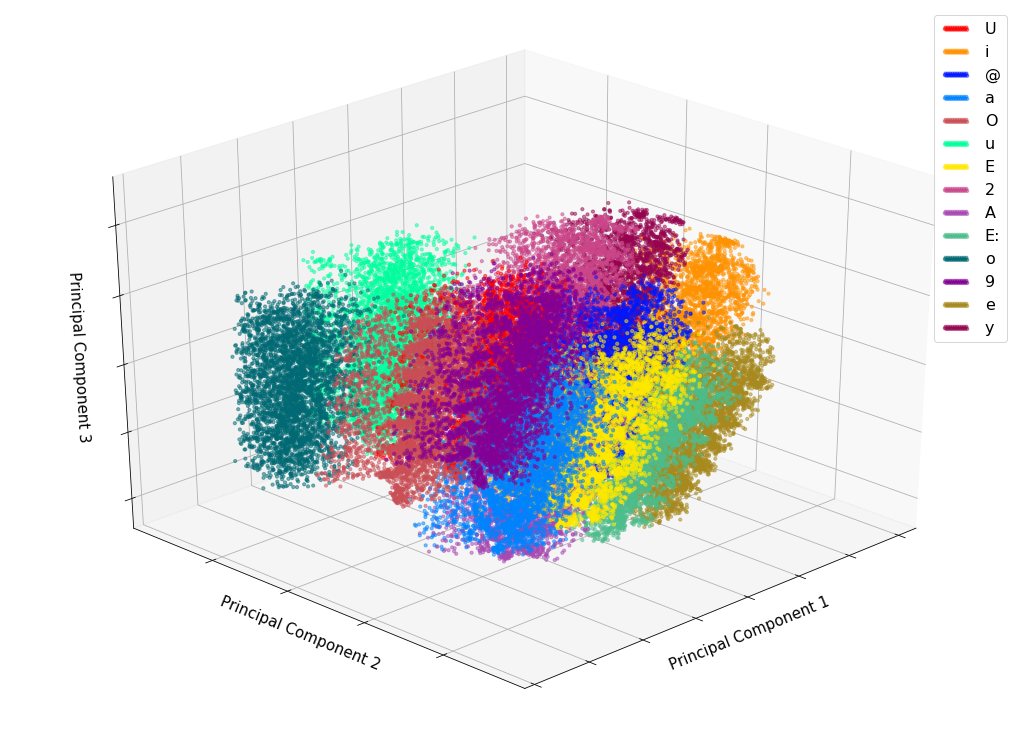

<Figure size 432x288 with 0 Axes>

In [18]:
fig = plt.figure(figsize=(20, 10))
ax = Axes3D(fig, rect=[0, 0, .7, 1], elev=30, azim=225)

i=0
color = ['#FF0000','#FF9200','#0018FF','#0084FF','#CA4E55','#00FF9E','#FFE900','#CB478A','#A849B3','#4DBD8B','#006973','#840095','#A7891E','#96044F','#007741']
targets = list(set(phonetic_sep))
for target in targets:
    indicesToKeep = pca_data['phonetic'] == target
    ax.scatter(pca_data.loc[indicesToKeep, 'PCA1']
               , pca_data.loc[indicesToKeep, 'PCA2']
               , pca_data.loc[indicesToKeep, 'PCA3']
               , s = 10, alpha=0.5,color = color[i])
    i += 1
lgnd = ax.legend(targets, scatterpoints=30, fontsize=16)
ax.grid()
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()
plt.savefig('pca_all_3d.png')

### Sampling Data

In [19]:
sampling = np.random.choice(phonetic_sep.shape[0], 1000, replace=False)
sam_phonetic_sep = phonetic_sep[sampling]
sam_label_sep = label_sep[sampling]

In [20]:
sam_pca = PCA(n_components=3)
sam_pca.fit(sam_label_sep)
sam_labels_pca = pca.transform(sam_label_sep)
sam_pca_data = pd.DataFrame({'phonetic': sam_phonetic_sep, 'PCA1': sam_labels_pca[:,0], 'PCA2': sam_labels_pca[:,1],'PCA3': sam_labels_pca[:,2]})

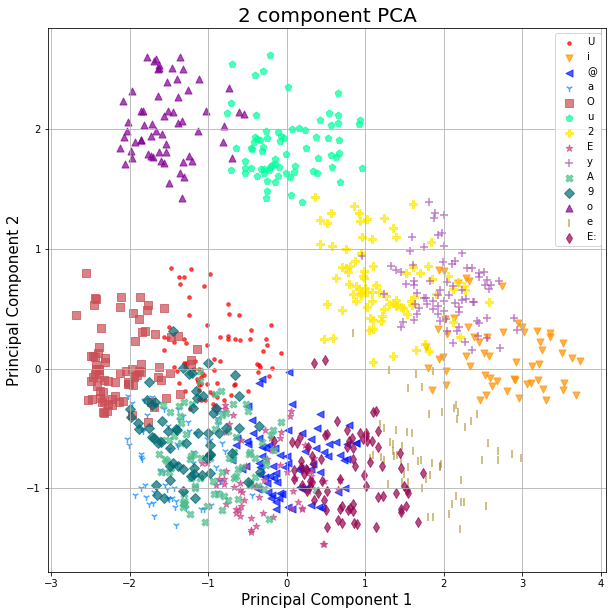

In [21]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
markers = [".","v","<","1","s","p","P","*","+","X","D","^","|","d","3"]
color = ['#FF0000','#FF9200','#0018FF','#0084FF','#CA4E55','#00FF9E','#FFE900','#CB478A','#A849B3','#4DBD8B','#006973','#840095','#A7891E','#96044F','#007741']

i = 0
targets = list(set(sam_phonetic_sep))
for target in targets:
    indicesToKeep = sam_pca_data['phonetic'] == target
    ax.scatter(sam_pca_data.loc[indicesToKeep, 'PCA1']
               , sam_pca_data.loc[indicesToKeep, 'PCA2']
               , s = 50,
               alpha=0.7,
              color=color[i],
              marker=markers[i])
    i += 1
lgnd = ax.legend(targets, scatterpoints=1)
ax.grid()
plt.savefig('pca_1_2.png')

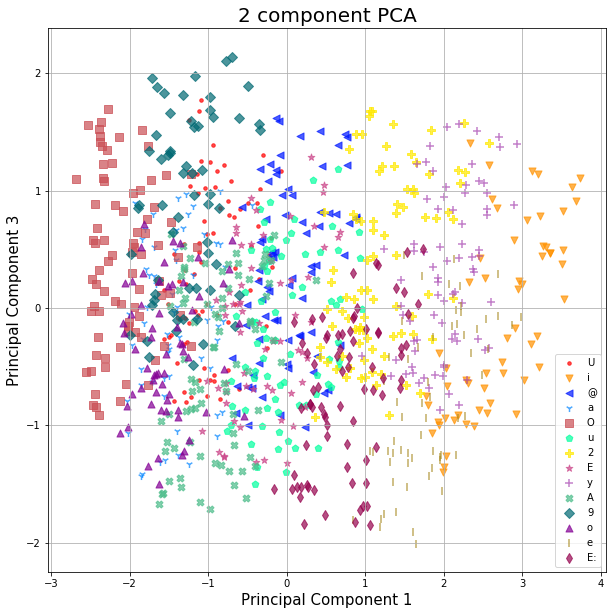

In [22]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
markers = [".","v","<","1","s","p","P","*","+","X","D","^","|","d","3"]
color = ['#FF0000','#FF9200','#0018FF','#0084FF','#CA4E55','#00FF9E','#FFE900','#CB478A','#A849B3','#4DBD8B','#006973','#840095','#A7891E','#96044F','#007741']

i = 0
targets = list(set(sam_phonetic_sep))
for target in targets:
    indicesToKeep = sam_pca_data['phonetic'] == target
    ax.scatter(sam_pca_data.loc[indicesToKeep, 'PCA1']
               , sam_pca_data.loc[indicesToKeep, 'PCA3']
               , s = 50,
               alpha=0.7,
              color=color[i],
              marker=markers[i])
    i += 1
lgnd = ax.legend(targets, scatterpoints=1)
ax.grid()
plt.savefig('pca_1_3.png')

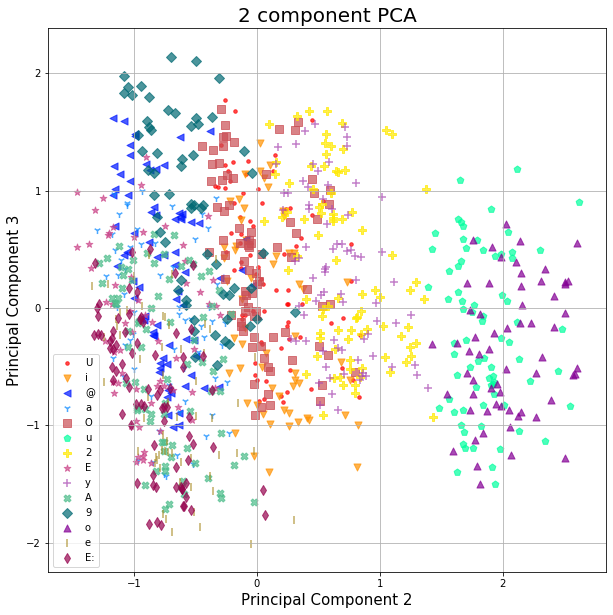

In [23]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
markers = [".","v","<","1","s","p","P","*","+","X","D","^","|","d","3"]
color = ['#FF0000','#FF9200','#0018FF','#0084FF','#CA4E55','#00FF9E','#FFE900','#CB478A','#A849B3','#4DBD8B','#006973','#840095','#A7891E','#96044F','#007741']

i = 0
targets = list(set(sam_phonetic_sep))
for target in targets:
    indicesToKeep = sam_pca_data['phonetic'] == target
    ax.scatter(sam_pca_data.loc[indicesToKeep, 'PCA2']
               , sam_pca_data.loc[indicesToKeep, 'PCA3']
               , s = 50,
               alpha=0.7,
              color=color[i],
              marker=markers[i])
    i += 1
lgnd = ax.legend(targets, scatterpoints=1)
ax.grid()
plt.savefig('pca_2_3.png')

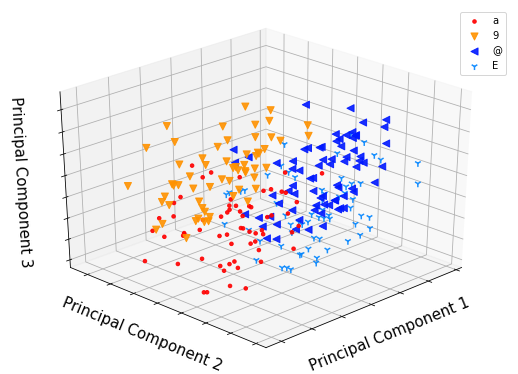

<Figure size 432x288 with 0 Axes>

In [24]:
fig = plt.figure(figsize=(10, 5))
ax = Axes3D(fig, rect=[0, 0, .7, 1], elev=30, azim=225)

markers = [".","v","<","1","s","p","P","*","+","X","D","^","|","d","3"]
i=0
color = ['#FF0000','#FF9200','#0018FF','#0084FF','#CA4E55','#00FF9E','#FFE900','#CB478A','#A849B3','#4DBD8B','#006973','#840095','#A7891E','#96044F','#007741']
# targets = list(set(phonetic_sep))
targets = ['a','9','@','E']
for target in targets:
    indicesToKeep = sam_pca_data['phonetic'] == target
    ax.scatter(sam_pca_data.loc[indicesToKeep, 'PCA1']
               , sam_pca_data.loc[indicesToKeep, 'PCA2']
               , sam_pca_data.loc[indicesToKeep, 'PCA3']
               , s = 50, alpha=0.9,color = color[i],marker=markers[i])
    i += 1
lgnd = ax.legend(targets)
ax.grid()
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()
plt.savefig('pca_3d.png')

In [25]:
print(targets)

['a', '9', '@', 'E']


In [26]:
plt.close()

## Phonetic Plot 

In [27]:
phonetic.shape

(29322, 2)

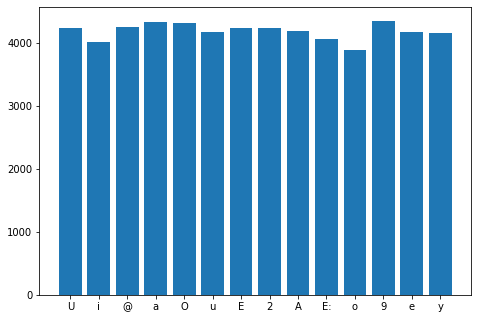

<Figure size 432x288 with 0 Axes>

In [31]:
# each
pho_set = list(set(phonetic_sep))
pho_count = [phonetic_sep.tolist().count(x) for x in pho_set]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(pho_set, pho_count)
plt.show()
plt.savefig('phonetic_barchart.png')

FileNotFoundError: [Errno 2] No such file or directory: 'E:.png'

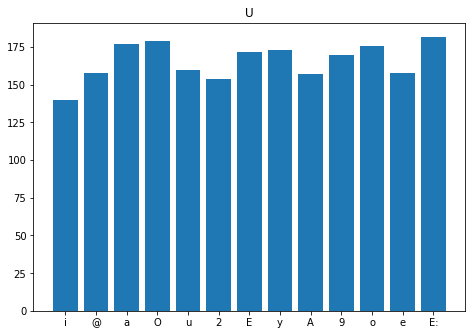

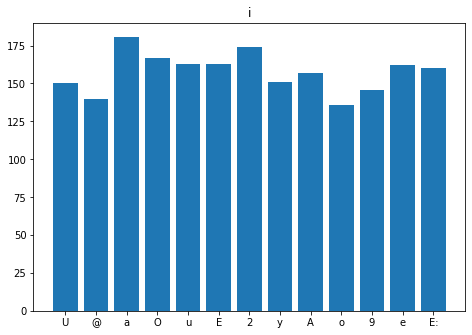

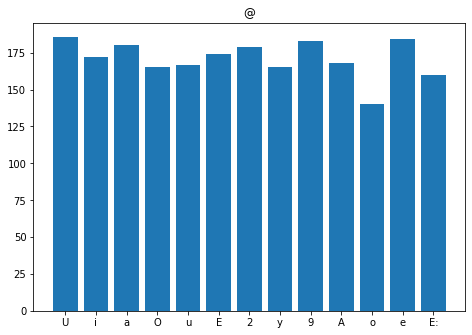

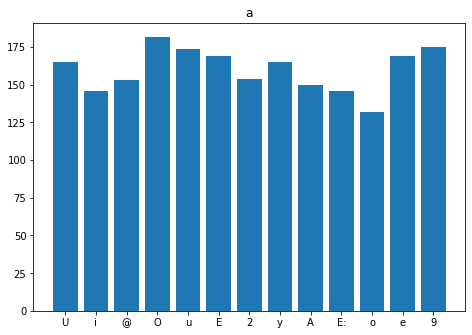

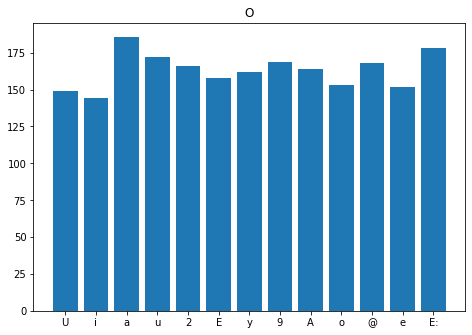

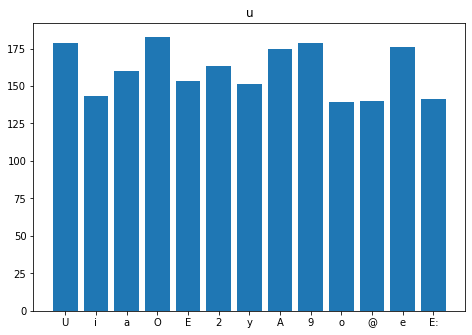

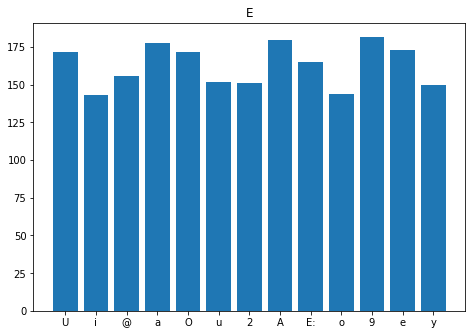

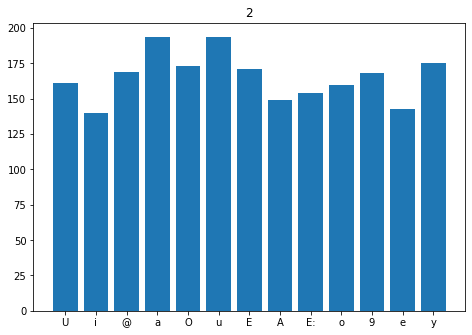

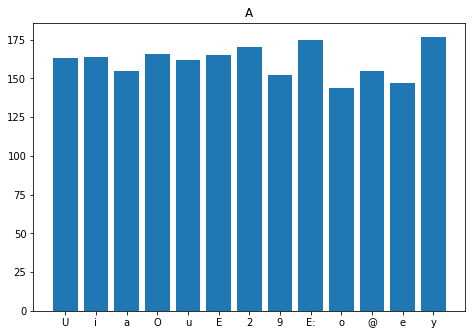

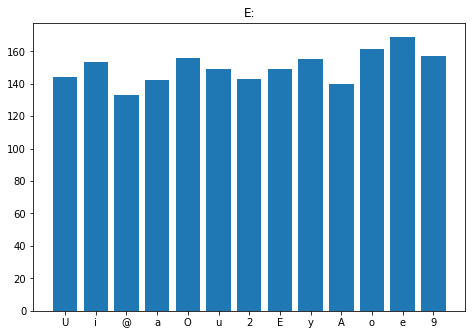

In [29]:
#pair
pho_set = list(set(phonetic_sep))
for pho in pho_set:
    phonetic_sep_list = np.array([ item[1] for item in phonetic if item[0] == pho])
    pho_set = list(set(phonetic_sep_list))
    pho_count = [phonetic_sep_list.tolist().count(x) for x in pho_set]
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(pho_set, pho_count)
    ax.set_title(pho)
    plt.savefig(pho+'.png')

## Plot sample data

In [ ]:
fig, ax = plt.subplots(3,3, figsize = (20,10))

for i in range(3):
    for j in range(3):
        idx = 10+i*3 + j
        ax[i][j].set_title('{}'.format(phonetic[idx]))
        ax[i][j].specgram(audio_data[idx],Fs=16000,cmap='gray')
plt.savefig('sample_spec.png')

In [ ]:
fig, ax = plt.subplots(3,3, figsize = (20,10))

for i in range(3):
    for j in range(3):
        idx = 10+i*3 + j
        ax[i][j].set_title('{}'.format(phonetic[idx]))
        ax[i][j].plot(audio_data[idx])
        ax[i][j].set_ylim([-0.175, 0.175])
plt.savefig('sample_wave.png')

## Simulated Speaker 

In [ ]:
param_file = 'sample_data/default_param_draft2.csv'

In [ ]:
param_df = pd.read_csv(param_file)
param_df.head()

In [ ]:

# predefine param
adult_high = np.array([1, -3.5, 0, 0, 1, 4, 1, 1, 1, 4, 1, 5.5, 2.5, 4, 5, 2, 0, 1.4, 1.4, 1.4, 1.4, 0.3, 0.3, 0.3])
adult_low = np.array([0,-6.0, -0.5, -7.0, -1.0, -2.0, 0, -0.1, 0, -3, -3, 1.5, -3.0, -3, -3, -4, -6, -1.4, -1.4, -1.4, -1.4, -0.05, -0.05, -0.05]) 
adult_neutral = np.array([1.,-4.75,0.,-2.,-0.07,0.95,0.,-0.1,0.,-0.4,-1.46,3.5,-1.,2.,0.5,0.,0.,0.,0.06,0.15,0.15,-0.05,-0.05,-0.05])

infant_high = np.array([1., -1.85, 0., 0., 1., 2.205, 1., 1., 1.,2.327, 0.630, 3.200, 1.457, 2.327, 2.835, 1.163, 0.079, 1.081, 1.081, 1.081, 1.081, 0.3, 0.3, 0.3])
infant_low = np.array([0., -3.228, -0.372, -7., -1., -1.102, 0.,-0.1, 0., -3.194, -1.574, 0.873, -1.574, -3.194, -1.574, -4.259, -3.228, -1.081, -1.081, -1.081, -1.081, 0., 0., 0.])
infant_neutral = np.array([1.,-2.643,0.,-2.,-0.07,0.524,0.,-0.1,0.,-0.426,-0.767,2.036,-0.578,1.163,0.321,0.,0.053,0.,0.046,0.116,0.116,0.,0.,0.])

adult_narrow=np.array([1.8,   0, 1.05,   -0.2,   1.55, -1.2,  2.68,  -3.2, 1.48,  -3.2, 1.1,  -1.2,  0, -1, 0, 0])
infant_narrow=np.array([1.378, 0 ,0.8036, -0.125, 1.08, -0.75, 1.768, -2,   1.133, -2,   0.63, -0.75, 0, -0.625, 0, 0])
adult_wide=np.array([3.3, 0, 2.13, -0.2, 1.9, -1.2, 2.68, -3.2, 1.48, -3.2, 1.45,  -1.2,  0, -1, 0, 0])
infant_wide=np.array([2.526, 0, 1.63, -0.125, 1.348, -0.75, 1.768, -2, 1.133, -2, 0.8978, -0.75, 0, -0.625, 0, 0])

param_name = np.array(["HX","HY","JX","JA","LP","LD","VS","VO","WC","TCX","TCY","TTX","TTY","TBX","TBY","TRX","TRY","TS1","TS2","TS3","TS4","MA1","MA2","MA3"])


In [ ]:
import re
def extract_param(speaker_path):
    # extract the numeric value from text file
    list_param = []
    with open(speaker_path, 'r') as file:
        text = [line.rstrip('\n') for line in file]   
    for content in text:
        numeric = re.findall(r"[-+]?\d*\.\d+|\d+", content)
        numeric = [float(i) for i in numeric]
        if numeric:
            list_param.append(np.array(numeric))
    return np.array(list_param)

def transform_param_data_to_npy(param_sets, param_col = 'PARAM'):

    syllable_labels = param_sets[param_col].values
    param_sets = param_sets.drop([param_col], axis=1)
    syllable_params = param_sets.values
    # param_names = param_sets.columns.values
    return syllable_params, syllable_labels

def simulate_speaker(scale_by, sid, predefined_syllables, syllable_labels):
    '''
    simulated speaker by scaling between adult to infant
    '''
    
    adult_header_file = 'sample_data/adult_speaker_header.txt'
    infant_header_file = 'sample_data/infant_speaker_header.txt'
    speaker_tail_file = 'sample_data/speaker_tail.txt'
    dataset_folder = 'sample_data/simulated_speakers'
    

    adult_param = extract_param(adult_header_file)
    infant_param = extract_param(infant_header_file)

    # compute the different of the parameter value between adult and infant
    # then, compute the change from the adult param to get new_param
    adjust_param = []
    for idx, param in enumerate(adult_param):
        adjust_param.append(param - (param - infant_param[idx])*np.full(param.shape, fill_value=scale_by))

    # compute a change of min, max, and neutral value of each vocaltract parameters
    change_high = adult_high - infant_high
    change_low = adult_low - infant_low
    change_neutral = adult_neutral - infant_neutral

    # decrease sizing simulation of a new high and low
    new_high = adult_high - (np.full(change_high.shape, fill_value=scale_by)*change_high)
    new_low = adult_low - (np.full(change_low.shape, fill_value=scale_by)*change_low)
    new_neutral = adult_neutral - (np.full(change_neutral.shape, fill_value=scale_by)*change_neutral)

    # compute larynx narrow and wide points
    change_narrow = np.nan_to_num(1-(infant_narrow/(adult_narrow)))
    change_wide = np.nan_to_num(1-(infant_wide/(adult_wide)))

    new_narrow = adult_narrow - adult_narrow*(np.full(change_narrow.shape, fill_value=scale_by)*change_narrow)
    new_wide = adult_wide - adult_wide*(np.full(change_wide.shape, fill_value=scale_by)*change_wide)

    speaker_sim_folder = join(dataset_folder,'simulated_speakers')

    os.makedirs(speaker_sim_folder, exist_ok = True)
    np.savez(join(speaker_sim_folder,'speaker_param_s%s.npz'%sid), high=new_high, low=new_low, neutral=new_neutral)

    def _write_speaker_template(is_complete_speaker_file=False):
        f.write('<speaker>\n<vocal_tract_model>\n<anatomy>\n<palate>\n')
        for i in range(9):
            f.write('<p%s x="%s" z="%s" teeth_height="%s" top_teeth_width="%s" bottom_teeth_width="%s" palate_height="%s" palate_angle_deg="%s"/>\n'%
                    (i,adjust_param[i][1],adjust_param[i][2],adjust_param[i][3],adjust_param[i][4],adjust_param[i][5],adjust_param[i][6],adjust_param[i][7]))
        f.write('</palate>\n')
        f.write('<jaw fulcrum_x="%s" fulcrum_y="%s" rest_pos_x="%s" rest_pos_y="%s" tooth_root_length="%s">\n'%
               (adjust_param[9][0],adjust_param[9][1],adjust_param[9][2],adjust_param[9][3],adjust_param[9][4]))
        for i in range(9):
            f.write('<p%s x="%s" z="%s" teeth_height="%s" top_teeth_width="%s" bottom_teeth_width="%s" jaw_height="%s" jaw_angle_deg="%s"/>\n'%
                    (i,adjust_param[i+10][1],adjust_param[i+10][2],adjust_param[i+10][3],adjust_param[i+10][4],adjust_param[i+10][5],adjust_param[i+10][6],adjust_param[i+10][7]))
        f.write('</jaw>\n<lips width="%s"/>\n<tongue>\n'%adjust_param[19][0])
        f.write('<tip radius="%s"/>\n'%adjust_param[20][0])
        f.write('<body radius_x="%s" radius_y="%s"/>\n'%(adjust_param[21][0],adjust_param[21][1]))
        f.write('<root automatic_calc="0" trx_slope="%s" trx_intercept="%s" try_slope="%s" try_intercept="%s"/>\n </tongue>\n'%(
            adjust_param[22][1],adjust_param[22][2],adjust_param[22][3],adjust_param[22][4]))
        f.write('<velum uvula_width="%s" uvula_height="%s" uvula_depth="%s" max_nasal_port_area="%s" >\n'%(
            adjust_param[23][0],adjust_param[23][1],adjust_param[23][2],adjust_param[23][3]))
        f.write('<low points="')
        for i in range(10):
            f.write('%s '%adjust_param[24][i])
        f.write('"/>\n')
        f.write('<mid points="')
        for i in range(10):
            f.write('%s '%adjust_param[25][i])
        f.write('"/>\n')
        f.write('<high points="')
        for i in range(10):
            f.write('%s '%adjust_param[26][i])
        f.write('"/>\n')
        f.write('</velum>\n')
        f.write('<pharynx fulcrum_x="%s" fulcrum_y="%s" rotation_angle_deg="%s" top_rib_y="%s" upper_depth="%s" lower_depth="%s" back_side_width="%s"/>'%(
        adjust_param[27][0],adjust_param[27][1],adjust_param[27][2],adjust_param[27][3],adjust_param[27][4],adjust_param[27][5],adjust_param[27][6]))
        f.write('<larynx upper_depth="%s" lower_depth="%s" epiglottis_width="%s" epiglottis_height="%s" epiglottis_depth="%s" epiglottis_angle_deg="%s">'%(adjust_param[28][0],adjust_param[28][1],adjust_param[28][2],adjust_param[28][3],adjust_param[28][4],adjust_param[28][5]))
        f.write('<narrow points="')
        for i in range(16):
            f.write('%s '%new_narrow[i])
        f.write('"/>\n')
        f.write('<wide points="')
        for i in range(16):
            f.write('%s '%new_wide[i])
        f.write('"/>\n')
        f.write('</larynx>\n')
        f.write('<piriform_fossa length="%s" volume="%s"/>\n'%(adjust_param[31][0],adjust_param[31][1]))
        f.write('<subglottal_cavity length="%s"/>\n'%(adjust_param[32][0]))
        f.write('<nasal_cavity length="%s"/>\n'%(adjust_param[33][0]))
        for i in range(24):
            f.write('<param index="%s"  name="%s"  min="%s"  max="%s"  neutral="%s" />\n'%
                    (i, param_name[i], new_low[i], new_high[i], new_neutral[i]))
        f.write('</anatomy>\n<shapes>\n')
        if is_complete_speaker_file:
            new_param = ((predefined_syllables - adult_low)/(adult_high - adult_low))*(new_high - new_low) + new_low
            for i, syllable in enumerate(syllable_labels):
                f.write('<shape name="%s">\n'%syllable)
                for j, name in enumerate(param_name):
                    f.write('<param name="%s" value="%.4f"/>\n'%(name, new_param[i][j]))
                f.write('</shape>\n')
            f.write(open(speaker_tail_file,'r').read())

    f = open(join(speaker_sim_folder,'speaker_s%s_partial.speaker'%sid), 'w')
    _write_speaker_template()
    f.close()

    # simulate a full speaker vocaltract model
    f = open(join(speaker_sim_folder,'speaker_s%s_full.speaker'%sid), 'w')
    _write_speaker_template(is_complete_speaker_file=True)
    f.close()

In [ ]:
predefined_syllables, syllable_labels = transform_param_data_to_npy(param_df, param_col = 'PARAM')
simulate_speaker(1.0, 8, predefined_syllables, syllable_labels)
simulate_speaker(-1.0, 9, predefined_syllables, syllable_labels)

## Generated Speaker 

In [ ]:
def create_ges_from_template(syllable_params):

    ges_path = join('sample_data','ges')
    os.makedirs(ges_path, exist_ok=True)    
    ges_file = 'sample_data/gesture_disyllable_template.ges' 
    
    ges_filenames = [ges_file]*len(syllable_params)
    shutil.copy(ges_file, ges_path)

    return ges_filenames

In [ ]:
SPEAKER_N = [0.0, 0.1, 0.2, 0.3, -0.1, -0.2, -0.3, 1.0, -1.0]
param_name = np.array(["HX","HY","JX","JA","LP","LD","VS","VO","WC","TCX","TCY","TTX","TTY","TBX","TBY","TRX","TRY","TS1","TS2","TS3","TS4","MA1","MA2","MA3"])
def create_speaker(filename, params, speaker_head, speaker_tail, is_disyllable):

    f = open(filename, 'w')
    f.write(speaker_head)
    if is_disyllable:

        # Loop through each parameter in the list
        for idx, pair_param in enumerate(params):
            if idx == 0: 
                f.write('<shape name="aaa">\n')
            else:
                f.write('<shape name="bbb">\n')
            for jdx, param in enumerate(pair_param):
                f.write('<param name="%s" value="%.2f"/>\n'%(param_name[jdx],param))
            f.write('</shape>\n')

    else:
        f.write('<shape name="aaa">\n')
        for jdx, param in enumerate(params):
            f.write('<param name="%s" value="%.2f"/>\n'%(param_name[jdx],param))
        f.write('</shape>\n')

    # Close with tail part of the speaker file
    f.write(speaker_tail)
    f.close()

def generate_speaker_file(batch_params, speaker_sid):
    
    speaker_tail_path = join('sample_data', 'speaker_tail.txt')

    # Check error
    if os.path.isfile(speaker_tail_path): 
        # Read speaker template
        speaker_tail = open(speaker_tail_path,'r').read()
    else:
        raise ValueError('Tail file not exist, %s'%speaker_tail_path)

    # Create speaker folder
    makedirs(join('sample_data', 'speaker'), exist_ok = True)
    # generate list of speaker filename
    speaker_filenames = ["sample_data/speaker/speaker{}.speaker".format(n) for n, _ in enumerate(batch_params)]

    for idx, params in enumerate(batch_params):
        # path to speaker head file
        speaker_head_file = join('sample_data','simulated_speakers', 'speaker_s%s_partial.speaker'%speaker_sid[idx])

        # check if speaker head file is exist
        if os.path.isfile(speaker_head_file): 
            speaker_head = open(speaker_head_file,'r').read()
        else: 
            raise ValueError('Head file not exist, %s'%speaker_head_file)
        create_speaker(speaker_filenames[idx], params, speaker_head, speaker_tail, True)

    return speaker_filenames

In [ ]:
def ges_to_wav(speaker_filenames, ges_filenames):
    
    makedirs(join('sample_data', 'sound'), exist_ok = True)
    makedirs(join('sample_data', 'feedback'), exist_ok = True)
    
    sound_sets = [join('sample_data', 'sound', "sound%s.wav"%str(x))  for x,_ in enumerate(speaker_filenames)]
    feedback_filenames = [join('sample_data', 'feedback', "feedback%s.txt"%str(x)) for x,_ in enumerate(speaker_filenames)]

    vtl_file_path = 'sample_data/VTL/VocalTractLabApi.dll'
    
    # initialize vocaltractlab application
    VTL = ctypes.cdll.LoadLibrary(vtl_file_path)
    # compute in c 
    for i, output_file in enumerate(sound_sets):
        speaker_file_name = ctypes.c_char_p(str.encode(speaker_filenames[i]))
        gesture_file_name = ctypes.c_char_p(str.encode(ges_filenames[i]))
        wav_file_name = ctypes.c_char_p(str.encode(output_file))
        feedback_file_name = ctypes.c_char_p(str.encode(feedback_filenames[i]))
        # generated wave
        failure = VTL.vtlGesToWav(speaker_file_name,  # input
                                  gesture_file_name,  # input
                                  wav_file_name,  # output
                                  feedback_file_name)  # output

    print(failure)
    return sound_sets

### Selected Params 

In [ ]:
param_au = [param_df[param_df.PARAM == 'a'].drop('PARAM', axis=1).values.tolist()[0], param_df[param_df.PARAM == 'u'].drop('PARAM', axis=1).values.tolist()[0]]
speaker_sid = [0,1,2,3,4,5,6,7,8]
param_au = [param_au]*len(speaker_sid)

### Generated Data 

In [ ]:
speaker_filenames = generate_speaker_file(param_au, speaker_sid)
ges_filenames = create_ges_from_template(param_au)
sound_sets = ges_to_wav(speaker_filenames, ges_filenames)

In [ ]:
audio_speaker = [librosa.load(file, sr=16000)[0] for file in sound_sets]

### Spectrogram for each speaker 

In [ ]:
fig, ax = plt.subplots(9,1, figsize = (7,20))

for i in range(9):
        ax[i].set_title('Speaker Scale{}'.format(SPEAKER_N[i]))
        ax[i].specgram(audio_speaker[i],Fs=16000,cmap='gray')
plt.savefig('save_speaker_spec.png')

### Wave Signal 

In [ ]:
fig, ax = plt.subplots(9,1, figsize = (7,20))

for i in range(9):
        ax[i].set_title('Speaker Scale{}'.format(SPEAKER_N[i]))
        ax[i].plot(audio_speaker[i])
plt.savefig('save_speaker_wave.png')